In [1]:
import sys
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob

In [2]:
def CalcPrecisionRecallVec(TPFPpath):
    df = pd.read_csv(TPFPpath, sep="\t")
    df = df.set_index(["0"])
    df = df.sort_index(ascending=False)
    df["CumCount"] = df["total"].cumsum(axis=0)
    df["CumPos"] = df["NoOf1"].cumsum(axis=0)
    df["Precision"] = df["CumPos"]/df["CumCount"]
    df["Recall"] = df["CumPos"]/int(df["CumPos"].tail(1))
    df = df.sort_index()
    return df["Precision"], df["Recall"], pd.Series(df.index)

def CalcFmax(precision,recall, Threshs):
    precision_rev, recall_rev,Threshs_rev = np.flip(precision).reset_index(drop=True),np.flip(recall).reset_index(drop=True), np.flip(Threshs).reset_index(drop=True)
    F = (2*precision_rev*recall_rev)/(precision_rev + recall_rev)
    Fmax = F.max()
    maximumarg = np.argmax(F)
    ThreshMax = Threshs_rev[maximumarg]
    return Fmax, ThreshMax, F, Threshs_rev

In [3]:
file = "../ProbOfTP_FPs_ovLim_bits_summary.csv"

In [4]:
%config InlineBackend.figure_format = 'retina'

Text(0, 0.5, 'Precision')

<Figure size 10240x7680 with 0 Axes>

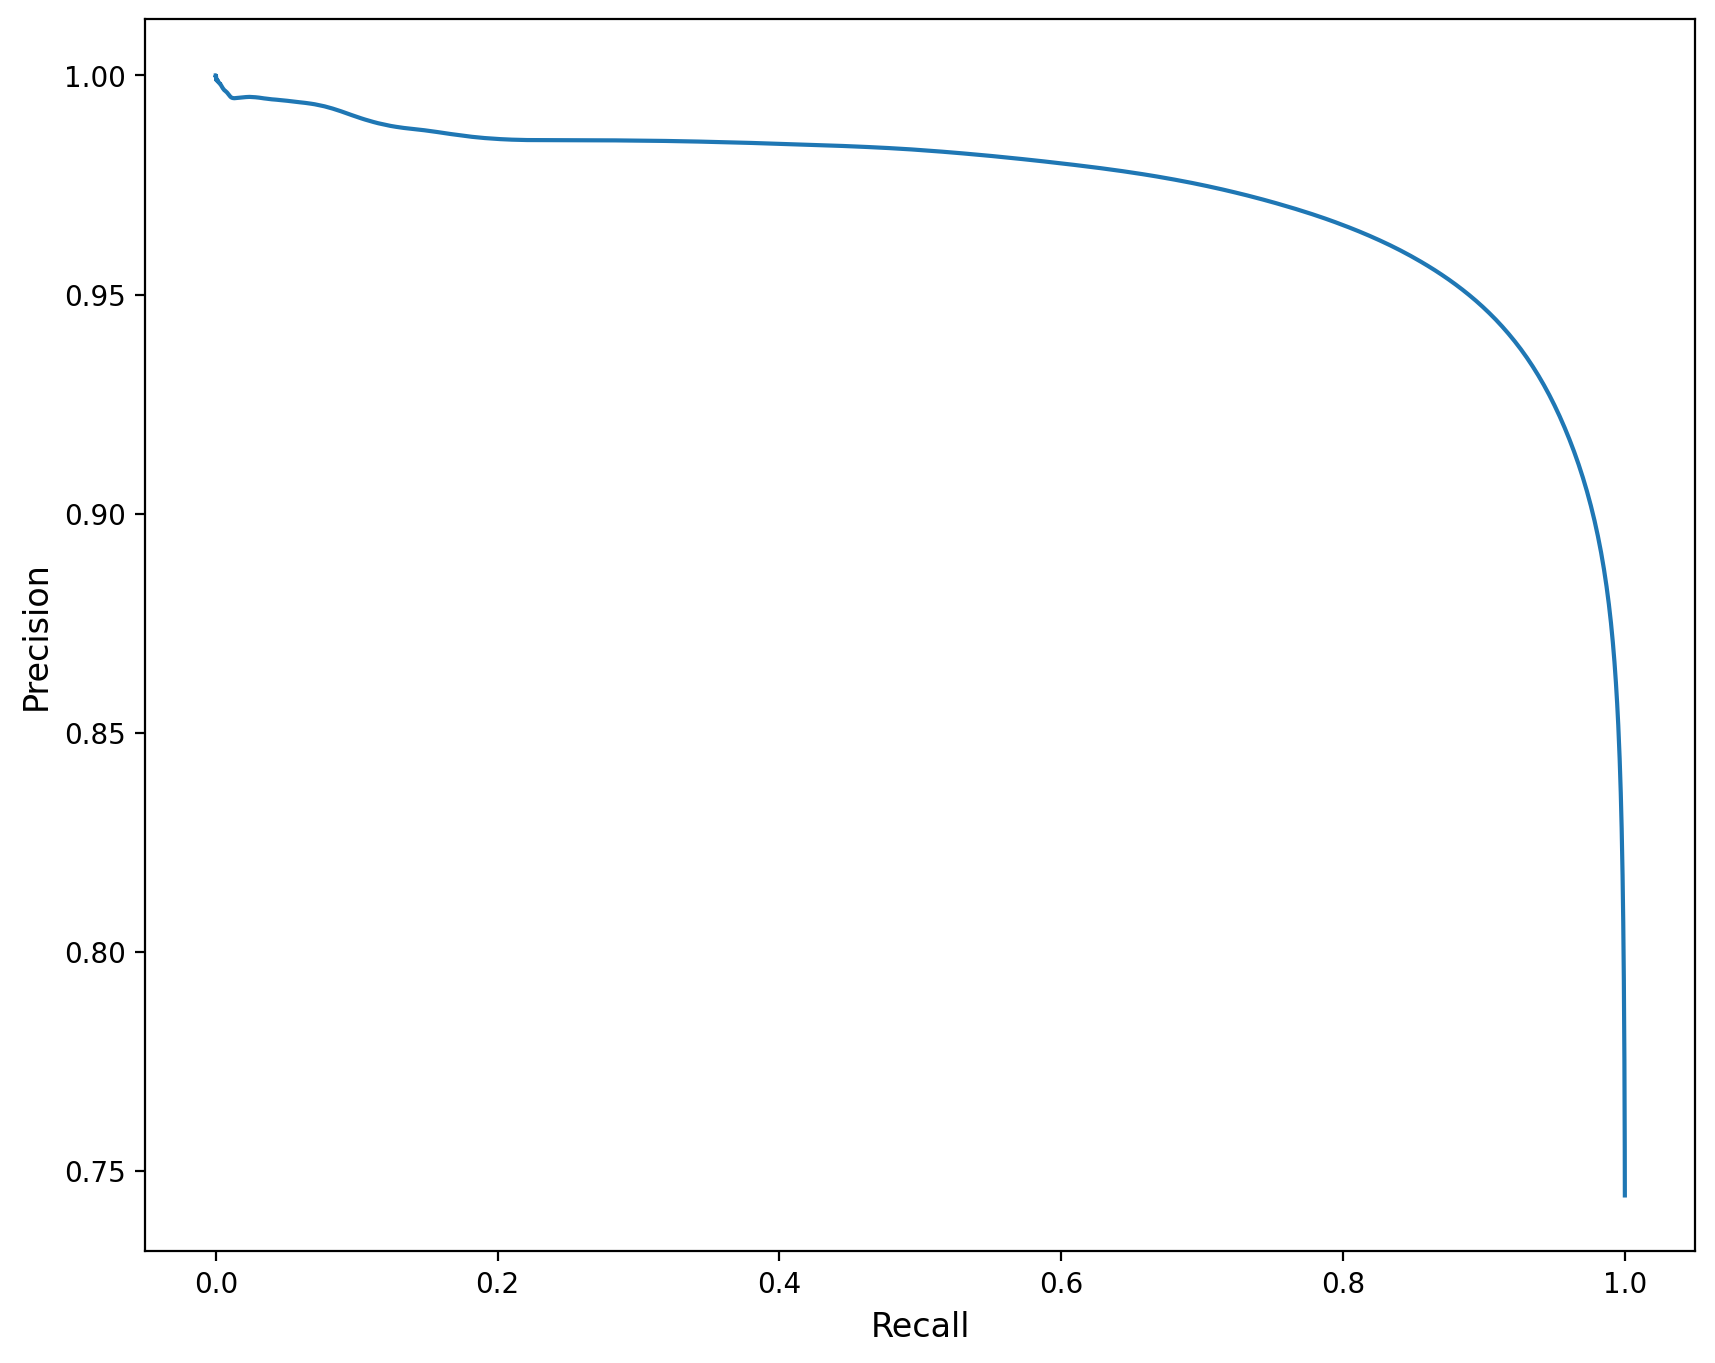

In [5]:
plt.figure(dpi=1600)
plt.figure(figsize=(10, 8))

precision,recall,thresh = CalcPrecisionRecallVec(file)
fmax,threshOfFmax,F, Threshs = CalcFmax(precision,recall,thresh)  
    
plt.plot(recall,precision)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)


In [6]:
print(fmax)
print(threshOfFmax)

0.9384001601618905
152


In [7]:
file = "../ProbOfTP_FPs_ovLim_prob_summary.csv"

In [8]:
%config InlineBackend.figure_format = 'retina'

Text(0, 0.5, 'Precision')

<Figure size 10240x7680 with 0 Axes>

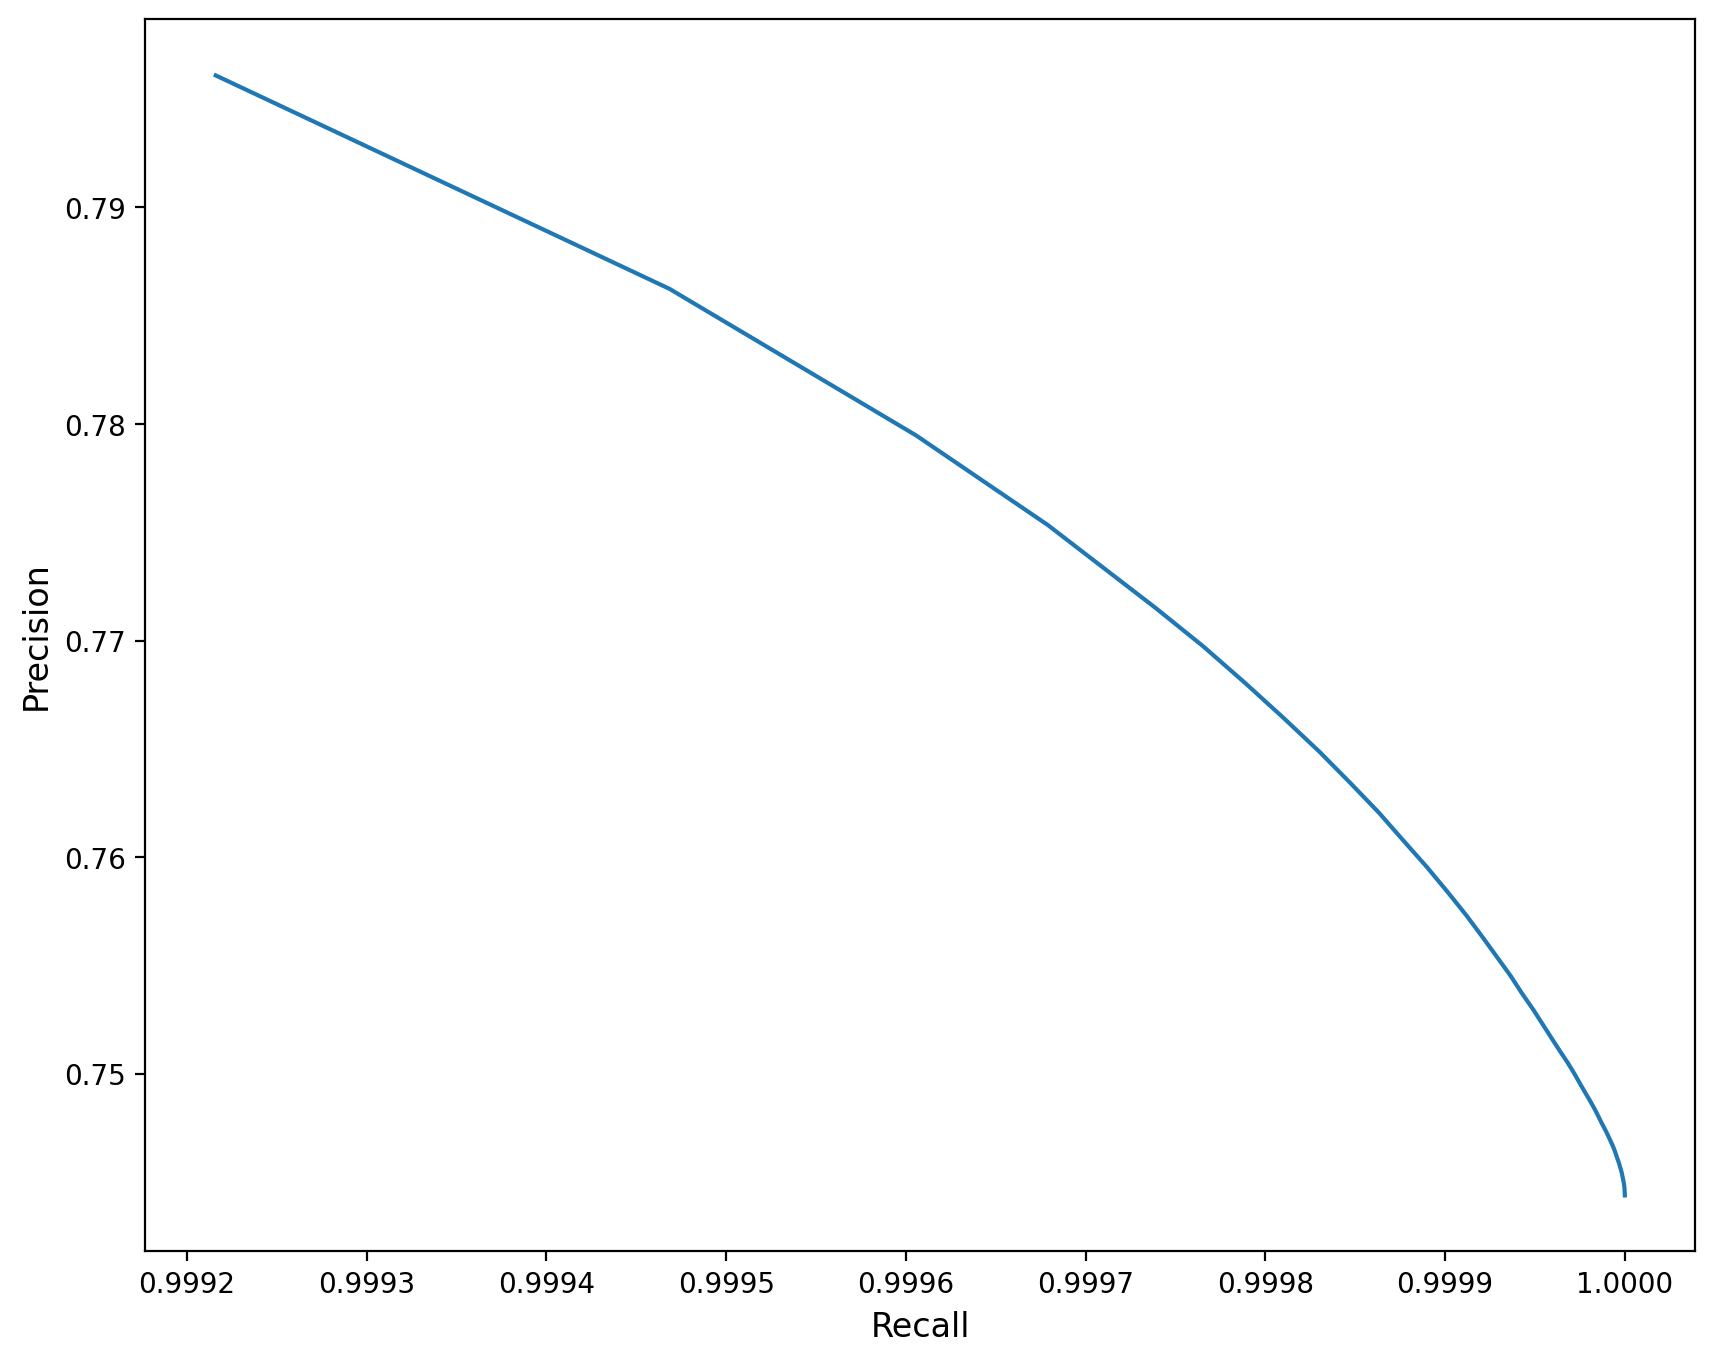

In [9]:
plt.figure(dpi=1600)
plt.figure(figsize=(10, 8))

precision,recall,thresh = CalcPrecisionRecallVec(file)
fmax,threshOfFmax,F, Threshs = CalcFmax(precision,recall,thresh)  
    
plt.plot(recall,precision)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)

In [10]:
precision.max() - precision.min()

0.05169460871489262

In [13]:
print(fmax)
print(threshOfFmax)

0.8861594531304452
1.0


# MMseqs2
Benchmarking sequence based bit score

In [11]:
file = "../ProbOfTP_FPs_ovLim_bits_summary_seq.csv"

In [12]:
%config InlineBackend.figure_format = 'retina'

Text(0, 0.5, 'Precision')

<Figure size 10240x7680 with 0 Axes>

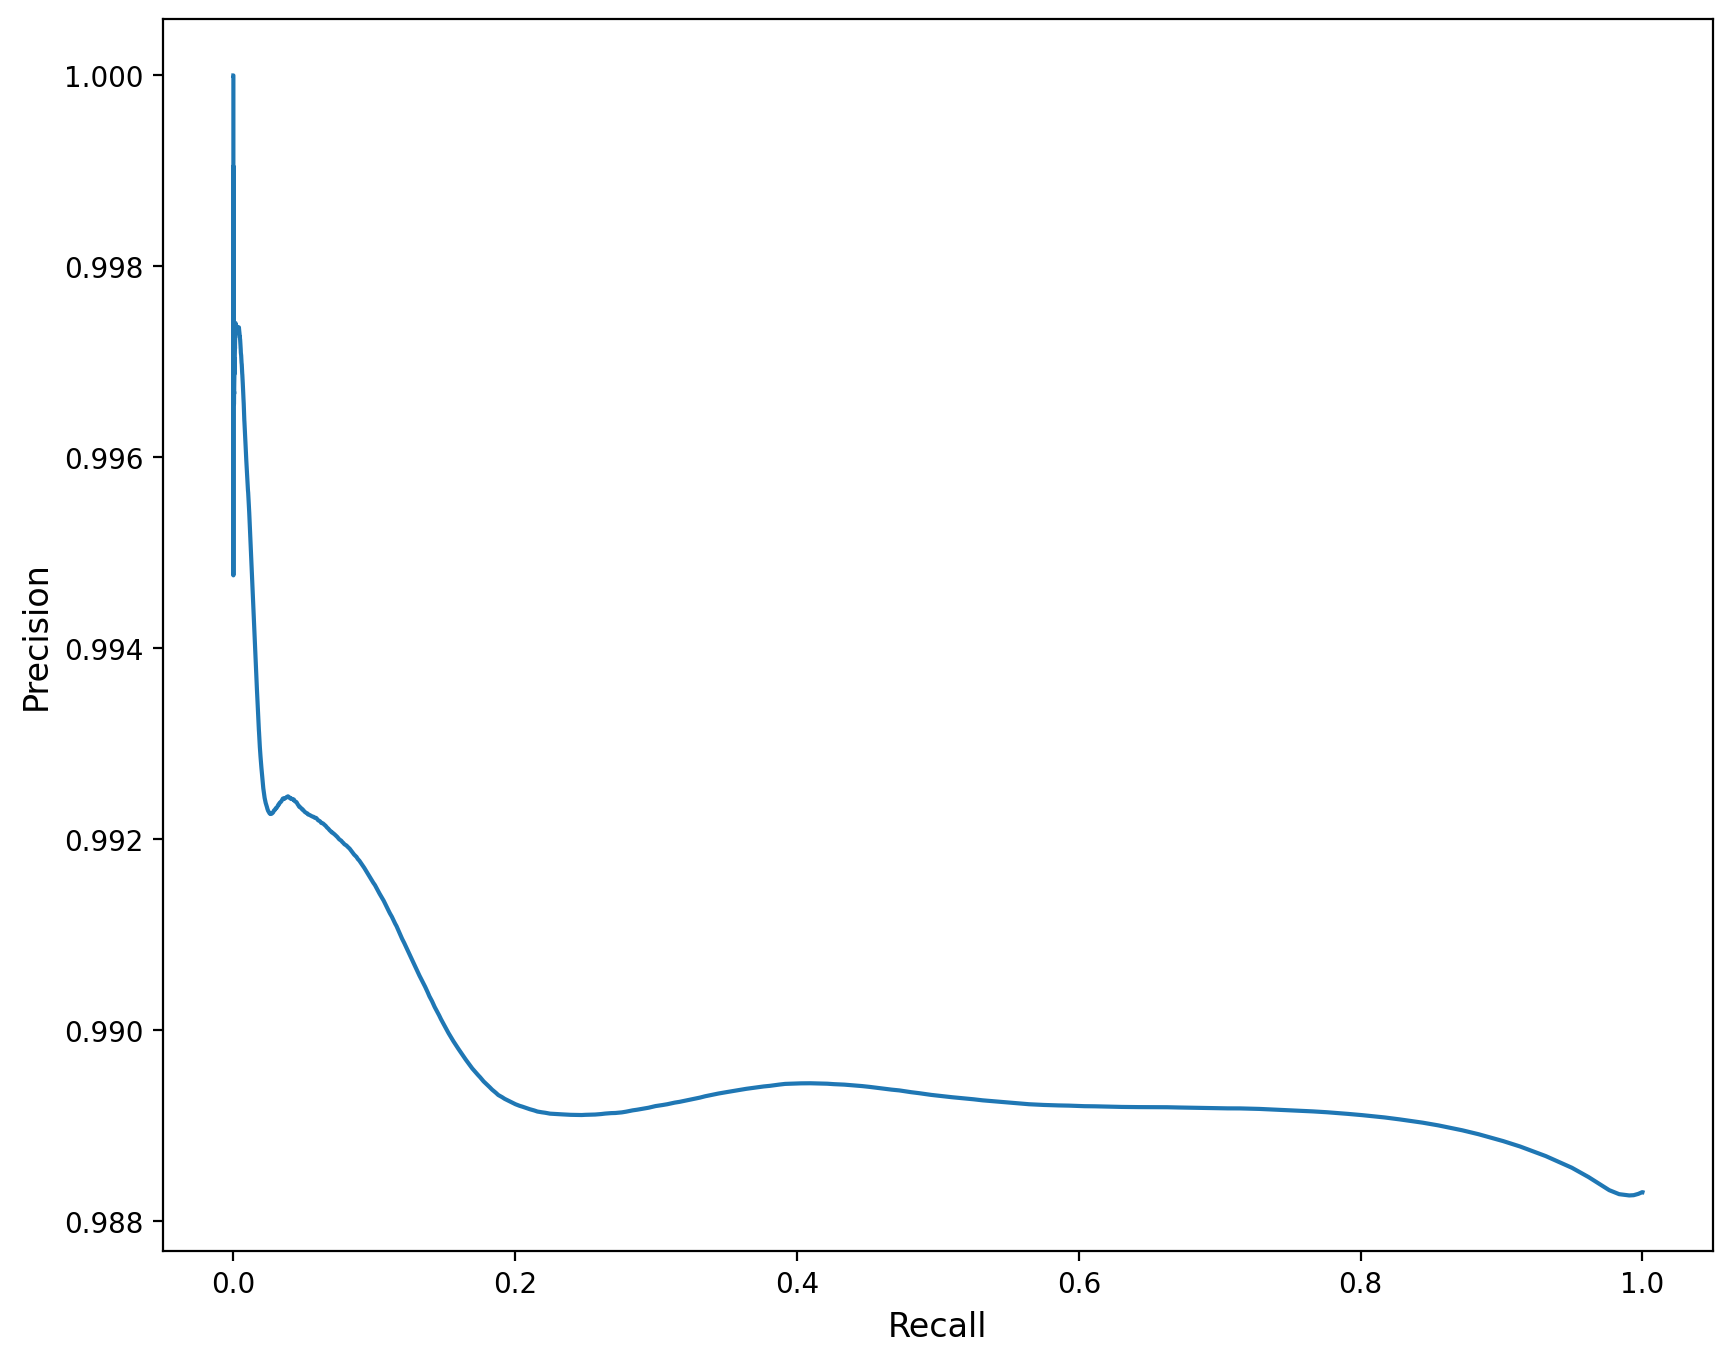

In [13]:
plt.figure(dpi=1600)
plt.figure(figsize=(10, 8))

precision,recall,thresh = CalcPrecisionRecallVec(file)
fmax,threshOfFmax,F, Threshs = CalcFmax(precision,recall,thresh)  
    
plt.plot(recall,precision)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)


In [14]:
print(fmax)
print(threshOfFmax)

0.9941178665547409
36
